First 10 values
['sepal length', 'sepal width', 'petal length', 'petal width']
['6.0', '2.2', '4.0', '1.0', 'Iris-versicolor']
['5.1', '3.8', '1.6', '0.2', 'Iris-setosa']
['6.9', '3.1', '4.9', '1.5', 'Iris-versicolor']
['6.6', '3.0', '4.4', '1.4', 'Iris-versicolor']
['5.2', '3.4', '1.4', '0.2', 'Iris-setosa']
22 2
0 26
accuracy=0.96
error_rate=0.04
sensitivity=1.0
specificity=0.9285714285714286
precision=0.9166666666666666
recall=1.0
f_measure=0.9565217391304348


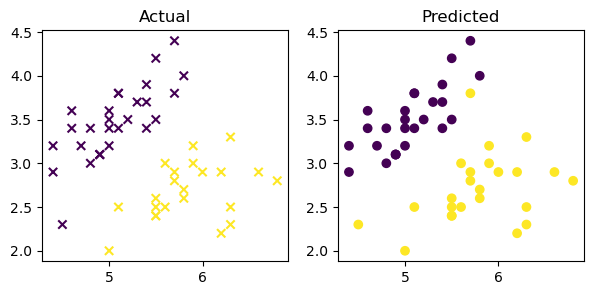

In [5]:
import numpy as np
import matplotlib.pyplot as plt

distance = lambda xs, x: (((xs - x) ** 2) @ [1, 1]) ** 0.5


class KNN:
    def __init__(self, k): self.k = k

    def fit(self, xs, ys): self.xs, self.ys = xs, ys

    def predict(self, x):
        neighbourhood_distances = distance(self.xs, x)
        nearest_neighbor_indices = np.argsort(neighbourhood_distances)[:self.k]
        nearest_neighbor_labels = self.ys[nearest_neighbor_indices]
        unique_predictions = np.unique(nearest_neighbor_labels)
        prediction_counts = [np.sum(prediction == nearest_neighbor_labels) for prediction in unique_predictions]
        return max(zip(prediction_counts, unique_predictions))[1]


if __name__ == '__main__':
    feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    dataset = [row.split(',') for row in open('iris.data').read().split('\n') if not row.endswith('Iris-virginica')]
    np.random.shuffle(dataset)
    print('First 10 values', feature_names, *dataset[:5], sep='\n')
    x_data = np.asarray([list(map(float, row[:2])) for row in dataset])  # only taking first 2 features
    y_data = np.asarray([[class_names.index(row[-1])] for row in dataset])  # last column is classes
    split_point = int(len(x_data) * 0.5)
    x_train, y_train, x_test, y_test = (x_data[:split_point], y_data[:split_point],
                                        x_data[split_point:], y_data[split_point:])

    model = KNN(2)
    model.fit(x_train, y_train)

    predictions = np.asarray([[model.predict(x)] for x in x_test])
    tp = np.sum([yt == 1 and pd == 1 for yt, pd in zip(y_test, predictions)])
    tn = np.sum([yt == 0 and pd == 0 for yt, pd in zip(y_test, predictions)])
    fp = np.sum([yt == 0 and pd == 1 for yt, pd in zip(y_test, predictions)])
    fn = np.sum([yt == 1 and pd == 0 for yt, pd in zip(y_test, predictions)])
    print(tp, fp)
    print(fn, tn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    error_rate = (fp + fn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_measure = 2 * precision * recall / (precision + recall)
    print(f'{accuracy=}')
    print(f'{error_rate=}')
    print(f'{sensitivity=}')
    print(f'{specificity=}')
    print(f'{precision=}')
    print(f'{recall=}')
    print(f'{f_measure=}')
    _, axs = plt.subplots(1, 2, figsize=(7, 3))
    axs[0].set_title('Actual')
    axs[0].scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='x')
    axs[1].set_title('Predicted')
    axs[1].scatter(x_test[:, 0], x_test[:, 1], c=predictions)
    plt.show()
